<a href="https://colab.research.google.com/github/naftalima/redes-neurais/blob/master/mlp_spine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed May  8 14:54:58 2019

@author: Delgado
Fonte: https://www.kaggle.com/ahmethamzaemra/mlpclassifier-example/notebook
"""

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Dataset_spine.csv')

df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [3]:
df = df.drop(['Unnamed: 13'], axis=1) #Removendo Coluna "Unnamed: 13"

In [4]:
df.describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
Col1         310 non-null float64
Col2         310 non-null float64
Col3         310 non-null float64
Col4         310 non-null float64
Col5         310 non-null float64
Col6         310 non-null float64
Col7         310 non-null float64
Col8         310 non-null float64
Col9         310 non-null float64
Col10        310 non-null float64
Col11        310 non-null float64
Col12        310 non-null float64
Class_att    310 non-null object
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [6]:
"""
Col7 -> pelvic_slope -> inclinação pélvica
Col8 -> Direct_tilt -> Inclinação direta
Col9 -> thoracic_slope -> inclinação torácico
Col10 -> cervical_tilt - >inclinação cervical
Col11 -> sacrum_angle -> ângulo de sacro
Col12 -> scoliosis_slope -> inclinação da escoliose
"""

'\nCol7 -> pelvic_slope -> inclinação pélvica\nCol8 -> Direct_tilt -> Inclinação direta\nCol9 -> thoracic_slope -> inclinação torácico\nCol10 -> cervical_tilt - >inclinação cervical\nCol11 -> sacrum_angle -> ângulo de sacro\nCol12 -> scoliosis_slope -> inclinação da escoliose\n'

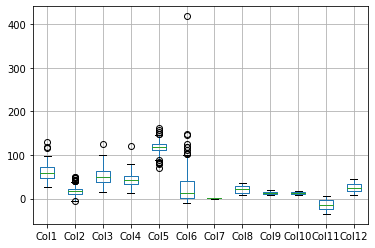

In [7]:
boxplot = df.boxplot(column=['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9',
       'Col10', 'Col11', 'Col12'])

In [8]:
df = df.drop(['Col7','Col8','Col9','Col10','Col11','Col12'], axis=1)

df.head()



,Col1,Col2,Col3,Col4,Col5,Col6,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

y = df['Class_att']
x = df.drop(['Class_att'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state=27)

In [10]:
clf = MLPClassifier(hidden_layer_sizes=(200,200,200,200), max_iter=50000, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21, tol=0.000000001, learning_rate='adaptive',
                    learning_rate_init=0.00001)
clf.fit(x_train, y_train)

Iteration 1, loss = 5.65349709
Iteration 2, loss = 5.28020215
Iteration 3, loss = 4.70035027
Iteration 4, loss = 3.97510891
Iteration 5, loss = 3.15046457
Iteration 6, loss = 2.28546975
Iteration 7, loss = 1.47009078
Iteration 8, loss = 0.84980315
Iteration 9, loss = 0.58207013
Iteration 10, loss = 0.53982407
Iteration 11, loss = 0.61078668
Iteration 12, loss = 0.67686784
Iteration 13, loss = 0.72248306
Iteration 14, loss = 0.73553985
Iteration 15, loss = 0.72186115
Iteration 16, loss = 0.69025857
Iteration 17, loss = 0.64600918
Iteration 18, loss = 0.59957272
Iteration 19, loss = 0.55268264
Iteration 20, loss = 0.51506529
Iteration 21, loss = 0.48778625
Iteration 22, loss = 0.46893826
Iteration 23, loss = 0.45971557
Iteration 24, loss = 0.45850109
Iteration 25, loss = 0.45565970
Iteration 26, loss = 0.45574746
Iteration 27, loss = 0.45424523
Iteration 28, loss = 0.45287437
Iteration 29, loss = 0.45124644
Iteration 30, loss = 0.44913779
Iteration 31, loss = 0.44632037
Iteration 32, los

Iteration 257, loss = 0.33287498
Iteration 258, loss = 0.33269507
Iteration 259, loss = 0.33256263
Iteration 260, loss = 0.33243074
Iteration 261, loss = 0.33231364
Iteration 262, loss = 0.33210273
Iteration 263, loss = 0.33193388
Iteration 264, loss = 0.33183239
Iteration 265, loss = 0.33163675
Iteration 266, loss = 0.33151359
Iteration 267, loss = 0.33136901
Iteration 268, loss = 0.33131037
Iteration 269, loss = 0.33120851
Iteration 270, loss = 0.33111148
Iteration 271, loss = 0.33092839
Iteration 272, loss = 0.33066598
Iteration 273, loss = 0.33063974
Iteration 274, loss = 0.33028716
Iteration 275, loss = 0.33019836
Iteration 276, loss = 0.32997605
Iteration 277, loss = 0.32996542
Iteration 278, loss = 0.32972335
Iteration 279, loss = 0.32950850
Iteration 280, loss = 0.32933968
Iteration 281, loss = 0.32919204
Iteration 282, loss = 0.32904601
Iteration 283, loss = 0.32888262
Iteration 284, loss = 0.32875152
Iteration 285, loss = 0.32864428
Iteration 286, loss = 0.32883855
Iteration 

Iteration 518, loss = 0.31645949
Iteration 519, loss = 0.31641503
Iteration 520, loss = 0.31639865
Iteration 521, loss = 0.31638205
Iteration 522, loss = 0.31636703
Iteration 523, loss = 0.31634750
Iteration 524, loss = 0.31633287
Iteration 525, loss = 0.31631242
Iteration 526, loss = 0.31630062
Iteration 527, loss = 0.31627228
Iteration 528, loss = 0.31626889
Iteration 529, loss = 0.31627345
Iteration 530, loss = 0.31624237
Iteration 531, loss = 0.31622854
Iteration 532, loss = 0.31621616
Iteration 533, loss = 0.31620678
Iteration 534, loss = 0.31619093
Iteration 535, loss = 0.31617798
Iteration 536, loss = 0.31616538
Iteration 537, loss = 0.31617213
Iteration 538, loss = 0.31613941
Iteration 539, loss = 0.31611986
Iteration 540, loss = 0.31610245
Iteration 541, loss = 0.31608645
Iteration 542, loss = 0.31606949
Iteration 543, loss = 0.31606829
Iteration 544, loss = 0.31604338
Iteration 545, loss = 0.31603733
Iteration 546, loss = 0.31601423
Iteration 547, loss = 0.31600084
Iteration 

Iteration 769, loss = 0.31305554
Iteration 770, loss = 0.31306770
Iteration 771, loss = 0.31302776
Iteration 772, loss = 0.31301673
Iteration 773, loss = 0.31299787
Iteration 774, loss = 0.31299685
Iteration 775, loss = 0.31297600
Iteration 776, loss = 0.31295070
Iteration 777, loss = 0.31294292
Iteration 778, loss = 0.31292500
Iteration 779, loss = 0.31292486
Iteration 780, loss = 0.31290056
Iteration 781, loss = 0.31290324
Iteration 782, loss = 0.31287569
Iteration 783, loss = 0.31285307
Iteration 784, loss = 0.31286281
Iteration 785, loss = 0.31286888
Iteration 786, loss = 0.31286492
Iteration 787, loss = 0.31286289
Iteration 788, loss = 0.31289744
Iteration 789, loss = 0.31287838
Iteration 790, loss = 0.31286062
Iteration 791, loss = 0.31285234
Iteration 792, loss = 0.31285312
Iteration 793, loss = 0.31281596
Iteration 794, loss = 0.31278084
Iteration 795, loss = 0.31273697
Iteration 796, loss = 0.31273454
Iteration 797, loss = 0.31267876
Iteration 798, loss = 0.31269692
Iteration 

Iteration 1035, loss = 0.31182049
Iteration 1036, loss = 0.31181771
Iteration 1037, loss = 0.31181504
Iteration 1038, loss = 0.31181447
Iteration 1039, loss = 0.31180894
Iteration 1040, loss = 0.31180534
Iteration 1041, loss = 0.31180460
Iteration 1042, loss = 0.31180227
Iteration 1043, loss = 0.31181431
Iteration 1044, loss = 0.31180668
Iteration 1045, loss = 0.31180432
Iteration 1046, loss = 0.31180283
Iteration 1047, loss = 0.31180076
Iteration 1048, loss = 0.31179922
Iteration 1049, loss = 0.31179880
Iteration 1050, loss = 0.31179719
Iteration 1051, loss = 0.31179636
Iteration 1052, loss = 0.31179952
Iteration 1053, loss = 0.31179566
Iteration 1054, loss = 0.31179327
Iteration 1055, loss = 0.31179152
Iteration 1056, loss = 0.31179038
Iteration 1057, loss = 0.31178796
Iteration 1058, loss = 0.31178615
Iteration 1059, loss = 0.31178389
Iteration 1060, loss = 0.31178052
Iteration 1061, loss = 0.31177839
Iteration 1062, loss = 0.31177795
Iteration 1063, loss = 0.31177158
Iteration 1064

Iteration 1290, loss = 0.31118972
Iteration 1291, loss = 0.31118678
Iteration 1292, loss = 0.31119099
Iteration 1293, loss = 0.31118346
Iteration 1294, loss = 0.31117879
Iteration 1295, loss = 0.31117750
Iteration 1296, loss = 0.31117852
Iteration 1297, loss = 0.31117008
Iteration 1298, loss = 0.31116956
Iteration 1299, loss = 0.31116565
Iteration 1300, loss = 0.31116856
Iteration 1301, loss = 0.31116408
Iteration 1302, loss = 0.31117189
Iteration 1303, loss = 0.31118061
Iteration 1304, loss = 0.31117053
Iteration 1305, loss = 0.31116849
Iteration 1306, loss = 0.31117016
Iteration 1307, loss = 0.31116502
Iteration 1308, loss = 0.31116019
Iteration 1309, loss = 0.31115569
Iteration 1310, loss = 0.31115022
Iteration 1311, loss = 0.31114713
Iteration 1312, loss = 0.31114258
Iteration 1313, loss = 0.31113919
Iteration 1314, loss = 0.31113488
Iteration 1315, loss = 0.31113576
Iteration 1316, loss = 0.31112979
Iteration 1317, loss = 0.31112770
Iteration 1318, loss = 0.31112586
Iteration 1319

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(200, 200, 200, 200), learning_rate='adaptive',
              learning_rate_init=1e-05, max_iter=50000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=21, shuffle=True, solver='sgd', tol=1e-09,
              validation_fraction=0.1, verbose=10, warm_start=False)

In [11]:
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.8205128205128205


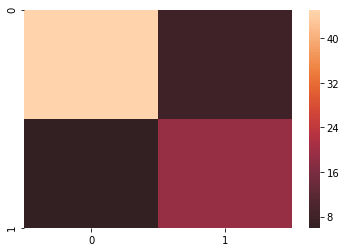

In [12]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, center=True)
plt.show()

In [13]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    Abnormal       0.88      0.85      0.87        53
      Normal       0.70      0.76      0.73        25

    accuracy                           0.82        78
   macro avg       0.79      0.80      0.80        78
weighted avg       0.83      0.82      0.82        78

